In [33]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from glob import iglob
import numpy as np
from imageio import imread
from sklearn.metrics import mean_squared_error
from numpy import mean
import seaborn as sns
import cv2
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [12]:
images_classes= []
color_faces= pd.DataFrame([])
gray_faces= pd.DataFrame([])
faces = pd.DataFrame([])
for path in iglob('./dataset/*.jpg'):
    clas= ((path.split('/')[-1]).split('.')[0]).split('_')[0]
    images_classes.append(int(clas)%10)
    
    image = cv2.imread(path)
    img=imread(path)
    color_face = pd.Series(img.flatten(),name=path)
    color_faces = color_faces.append(color_face)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_face = pd.Series(gray.flatten(),name=path)
    gray_faces = gray_faces.append(gray_face)
    
    scale_percent = 60 # percent of original size
    width = 64 
    height = 64
    dim = (width, height)
    gray = cv2.resize(gray, dim,interpolation = cv2.INTER_NEAREST)
    face = pd.Series(gray.flatten(),name=path)
    faces = faces.append(face)

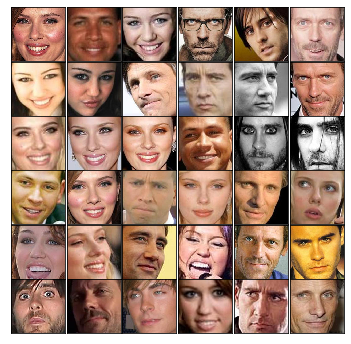

In [52]:
fig, axes = plt.subplots(6,6,figsize=(6,6),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(color_faces.iloc[i].values.reshape(256, 256, 3).astype('uint8'), cmap='gray')

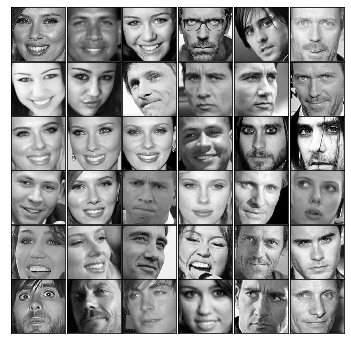

In [53]:
fig, axes = plt.subplots(6,6,figsize=(6,6),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(gray_faces.iloc[i].values.reshape(256, 256).astype('uint8'), cmap='gray')

In [4]:
approximation= []
for i in range(1, 101):
    approximation.append(i)

In [5]:
def cal_mse(original, approx):
    mat= np.subtract(original, approx)
    mat= np.square(mat)
    mat= np.sum(mat, axis=1)
    mse= np.sum(mat)
    return mse

In [ ]:
# flag= 1
# count= 0
# total_error= []
# PCA_faces= pd.DataFrame([])
# pictures= pd.DataFrame([])
# for i in range (len(faces)):
#     error =[]
#     gray= faces.iloc[i].values.reshape(153, 153).astype('uint8')
#     U, S, VT= np.linalg.svd(gray, full_matrices= False)
#     S= np.diag(S)
#     face = pd.Series(gray.flatten(),name=path)
    
#     for r in approximation:
#         approx= U[:,:r]@ S[0:r,:r]@ VT[:r,:]
#         face= pd.Series(approx.flatten(),name=path)
#         error.append(cal_mse(gray, approx))
#         if (flag):
#             pictures= pictures.append(face)
            
#     PCA_faces= PCA_faces.append(face)

#     total_error.append(error)
#     flag= 0

# total_error= np.asarray(total_error)


In [13]:
U, S, VT= np.linalg.svd(faces.T)

In [8]:
# ''' Standardize '''
# faces_std = faces
# faces_std -= np.mean(faces_std, axis=0)
# faces_std /= np.std(faces_std, axis=0)

In [20]:
for a in approximation:
    approx= U[:,:a]
    approx_img= faces.dot(approx)
    approx_img_final= approx_img.dot(approx.T)

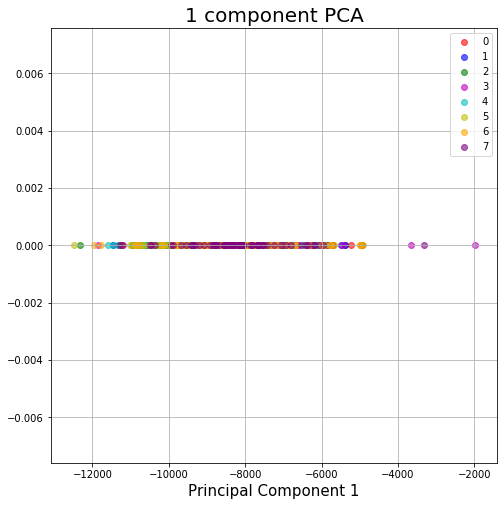

In [51]:
scatter_array= np.array(approx_img)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('1 component PCA', fontsize = 20)
for c in np.unique(images_classes):
    color = ['r', 'b', 'g', 'm', 'c', 'y', 'orange', 'purple'][int(c)]
    X_class= []
    for i in range (len(images_classes)):
        if(images_classes[i] == c):
            X_class.append(scatter_array[i])
    X_class= np.array(X_class)
    plt.scatter(X_class[:, 0], X_class[:, 1]*0, color= color, alpha= 0.6)

plt.legend(np.unique(images_classes))
plt.grid()

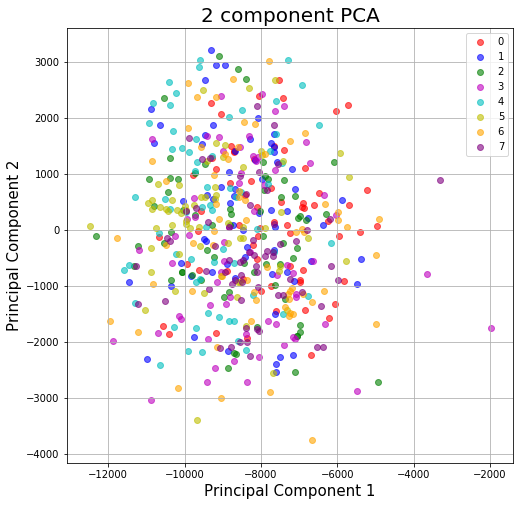

In [22]:
scatter_array= np.array(approx_img)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for c in np.unique(images_classes):
    color = ['r', 'b', 'g', 'm', 'c', 'y', 'orange', 'purple'][int(c)]
    X_class= []
    for i in range (len(images_classes)):
        if(images_classes[i] == c):
            X_class.append(scatter_array[i])
    X_class= np.array(X_class)
    plt.scatter(X_class[:, 0], X_class[:, 1], color= color, alpha= 0.6)

plt.legend(np.unique(images_classes))
plt.grid()

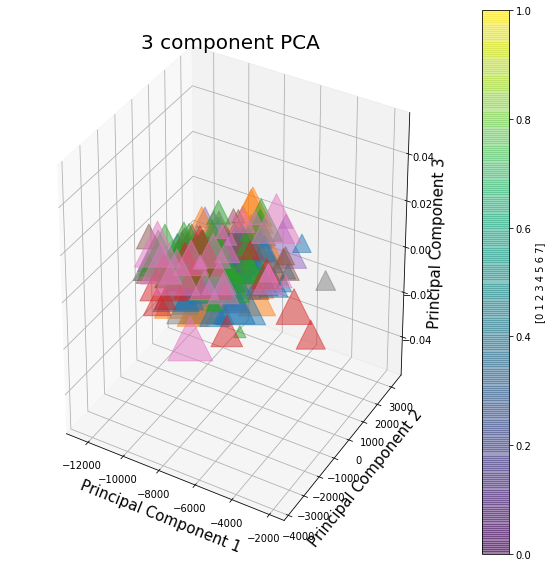

In [52]:
scatter_array= np.array(approx_img)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
for c in np.unique(images_classes):
    color = ['r', 'b', 'g', 'm', 'c', 'y', 'orange', 'purple'][int(c)]
    X_class= []
    for i in range (len(images_classes)):
        if(images_classes[i] == c):
            X_class.append(scatter_array[i])
    X_class= np.array(X_class)
    pnt3d= plt.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], marker='^', alpha= 0.5)
cbar=plt.colorbar(pnt3d)
cbar.set_label(np.unique(images_classes))
plt.grid()
plt.show()

In [ ]:
M = np.mean(total_error, axis= 0)

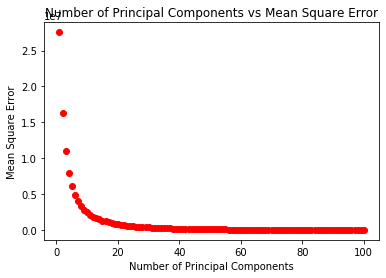

In [50]:
plt.scatter(approximation, M, c='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Square Error')
plt.title('Number of Principal Components vs Mean Square Error')
plt.show()

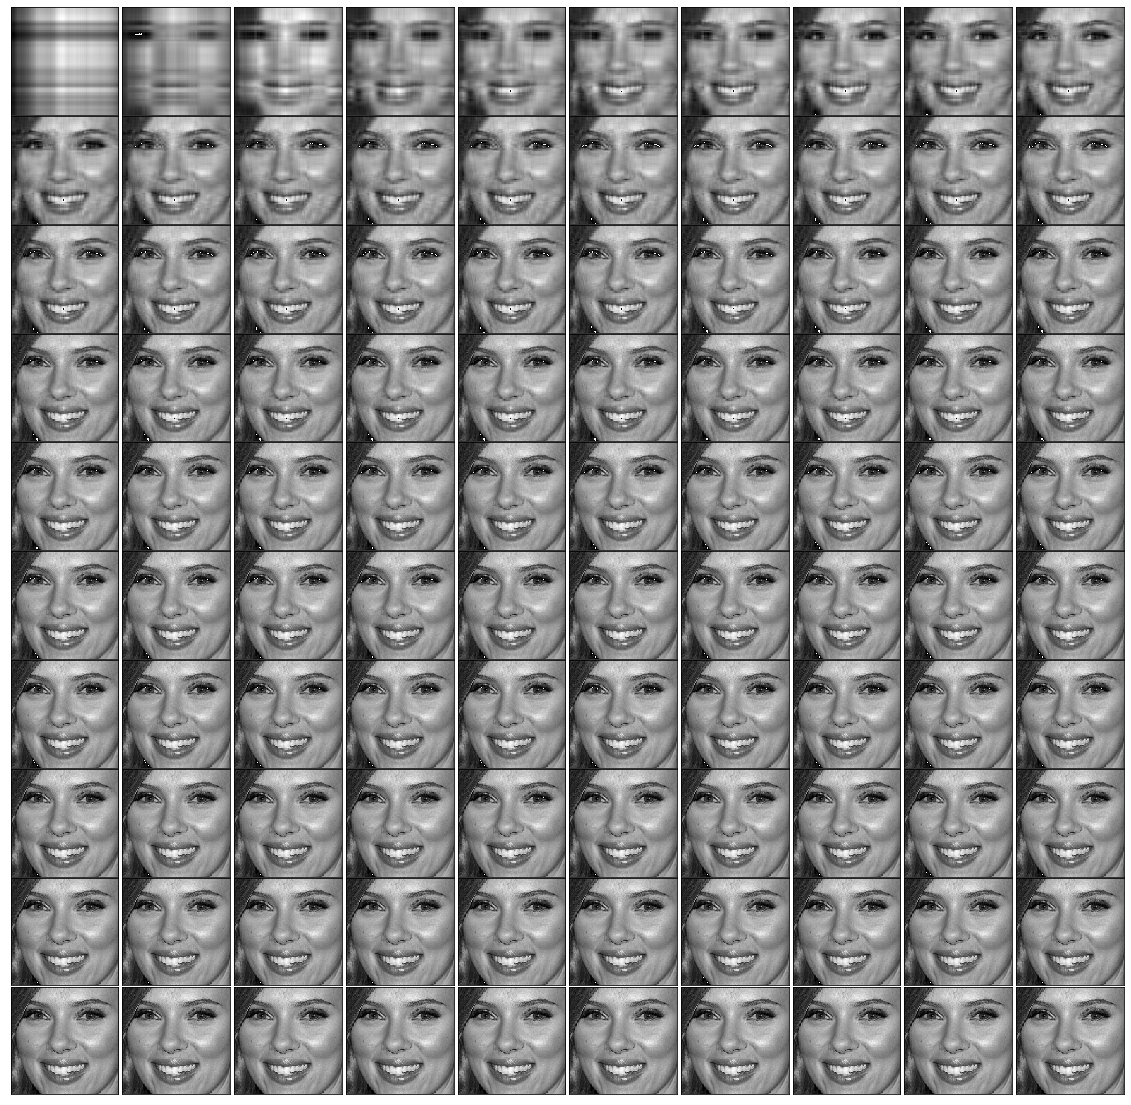

In [18]:
fig, axes = plt.subplots(10,10,figsize=(20,20),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for k, ax in enumerate(axes.flat):
    ax.imshow(pictures.iloc[k].values.reshape(153, 153).astype('uint8'), cmap='gray')